<a href="https://colab.research.google.com/github/blacksaturn1-wpi/Reinforcement-Learning-RBE-595-WPI/blob/assignment-1/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem

Figure 2.2 compares a greedy method with two ε-greedy methods (ε = 0.01 and ε = 0.1), as described above, on the 10-armed testbed. All the methods formed their action-value estimates using the sample-average technique. The upper graph shows the increase in expected reward with experience. The greedy method improved slightly faster than the other methods at the very beginning, but then leveled off at a lower level. It achieved a reward-per-step of only about 1, compared with the best possible of about 1.55 on this testbed. The greedy method performed significantly worse in the long run because it often got stuck performing suboptimal actions. The lower graph shows that the greedy method found the optimal action in only approximately one-third of the tasks. In the other two-thirds, its initial samples of the optimal action were disappointing, and it never returned to it. The ε-greedy methods eventually performed better because they continued to explore and to improve their chances of recognizing the optimal action. The ε = 0.1 method explored more, and usually found the optimal action earlier, but it never selected that action more than 91% of the time. The ε = 0.01 method improved more slowly, but eventually would perform better than the ε = 0.1 method on both performance measures shown in the figure. It is also possible to reduce ε over time to try to get the best of both high and low values.

Sutton, Richard S.; Barto, Andrew G.. Reinforcement Learning, second edition (Adaptive Computation and Machine Learning series) (pp. 29-30). MIT Press. Kindle Edition. 

# Procedure

Run 2 main tests to graph Quadrant I and III.  Simulate 2000 runs and calculate the estimated value of the reward

In [66]:
def sample_running_average(current_reward,current_average,previous_step):
  current_step=previous_step+1
  new_average = current_average + 1.0/current_step*(current_reward-current_average)
  return (new_average,current_step)

In [37]:
from random import choices
def testStochasticOutcomes():
  population = [0, 1]
  action1_weights = [0.8, 0.2]
  action2_weights = [0.9, 0.1]
  action1_reward=choices(population, action1_weights)
  action2_reward=choices(population, action2_weights)
  print(action1_reward[0])
  print(action2_reward[0])

In [25]:
debug=False

def estimateActionValues(r1,r2,q1,q2,n1,n2):
  q1,n1=sample_running_average(r1,q1,n1)
  if(debug):
      print("action1_reward: {0}, action1_reward_avg: {1}, action1_reward_count: {2}".format(r1,q1,n1))
  q2,n2=sample_running_average(r2,q2,n2)
  if(debug):
    print("action2_reward: {0}, action2_reward_avg: {1}, action2_reward_count: {2}".format(r2,q2,n2))
  return q1,q2,n1,n2

In [102]:
import numpy as np
def randomReward(mu,sigma,iterations):
  R_t=np.random.default_rng().normal(mu, sigma, iterations)
  return R_t

In [103]:
total = 0
[total := total + x for x in [1, 2, 3, 4, 5]]
print(total)
total = [x for x in [1, 2, 3, 4, 5]]
print(total)
sum(total)

15
[1, 2, 3, 4, 5]


15

In [104]:
def debugGraph(data,dimensions,xlabel,ylabel):
  x_plot=[]
  for x in range(dimensions):
    y_plot = data[x]
    x_plot = x+1  
    plt.plot(x_plot, y_plot, label="Action {} Rewards".format(x+1))
    plt.plot()

  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title("Algorithm Debug")
  plt.legend()
  plt.show()

In [131]:
def bandit(action,q_a,debug):
  if(debug):
    print("<action, type>",action,type(action))
  R_t = randomReward(q_a,1,1)
  return R_t[0]


In [170]:
def createBanditsProblem(kArms,problem_iterations):
  #make q(a) for each problem
  q_a = []
  mu, sigma = 0, 1 # mean and standard deviation
  for x in range(kArms):
    q_a.append(np.random.default_rng().normal(mu, sigma, problem_iterations))
  return q_a


q_a_test = createBanditsProblem(10,2)
print(q_a_test[0][0])

-1.2708777826128426


In [179]:
import matplotlib.pyplot as plt
import numpy as np
import random

def kArmedBanditSimulation(banditSimNumber,kArms,q_a,epsilon,steps,debug):

  Q_a = [0 for x in range(kArms)]
  N_a = [0 for x in range(kArms)]
  population = [0, 1]
  randomAction_weights = [1-epsilon, epsilon]

  # average rewards
  R_t_perStep=[]

  for t in range(steps):
    # choose action
    isRandomAction=choices(population, randomAction_weights)[0]
    if(debug):
      print("Is Random Action?", isRandomAction)
      
    if(isRandomAction):
      action = random.randint(0, 9)
      if(debug):
        print('Random action:',action)
    else:
      action_value_max = max(Q_a)
      if(debug):
          print("Max value action:",action_value_max)
      # Select actions which have max value randomly
      matchingActionValues = [x for x in Q_a if x==action_value_max ]
      if(debug):
          print(matchingActionValues)
      if(len(matchingActionValues)>1):
        nMatch = random.randint(0, len(matchingActionValues))
        pos = 0
        for n in range(nMatch):
          pos = Q_a.index(action_value_max)
          action = pos
      else:
        action = Q_a.index(matchingActionValues[0])  
      if(debug):
          print('Action selected:',action)
      
    R_t = bandit(action,q_a[action][banditSimNumber],debug)
    if(debug): 
      print("bandit() results R_t: ",R_t)
    Q_a[action],N_a[action] = sample_running_average(R_t,Q_a[action],N_a[action])
    if(debug):
       print("Action Value, Count",Q_a[action],N_a[action])
    R_t_perStep.append(R_t)
  return q_a , Q_a, N_a,R_t_perStep


#len(qa)
#len(qa[0])
#debugGraph(qa,kArms,'Action','Rewards')

In [178]:
debug=False
kArms, runs, steps, epsilon=10,2000,1000,0.0
q_a=createBanditsProblem(kArms,runs)
R_t_avgRun_perStep=[0 for x in range(steps)]
print(len(q_a[0]))
print(len(q_a))
print(q_a[0][0])
for r in range(runs):
  qa, Qa, Na,Rt_perStep = kArmedBanditSimulation(r,kArms,q_a,epsilon,steps,debug)
  if(debug):
    print("Run #",r)
    print("Rt_perStep",len(Rt_perStep))
  for step in range(len(Rt_perStep)):
      if(debug):
        print("B",R_t_avgRun_perStep)
      n=r+1
      R_t_avgRun_perStep[step],_ = sample_running_average(Rt_perStep[step],R_t_avgRun_perStep[step],n)
      if(debug):
        print("A",R_t_avgRun_perStep)
  #len(Qa)
  #for x in range(kArms):
  #  print(qa[x],Qa[x],Na[x])


#x_plot = []
x_plot = [x for x in range(1,steps+1)]
#print(x_plot)

#print(R_t_avgRun_perStep)
plt.plot(x_plot, R_t_avgRun_perStep, label="Greedy Average Per Step")
#plt.plot(x_plot, action2_reward_avg_y2, label="Action 2 Rewards")
plt.plot()

plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.title("10 Armed Test Bed")
plt.legend()
plt.show()

#action=0
#print(qa[0])
#R_t = randomReward(qa[action],1,1)
#print(R_t)

2000
10
0.17980270398841638


UnboundLocalError: ignored

In [ ]:
import matplotlib.pyplot as plt
debug=False
def 10ArmedBanditSimulation(action1_weights,action2_weights,population,iterations):
  
  # choose q(a)
  q_a = []
  mu, sigma = 0, 0.1 # mean and standard deviation
  for x in range(10):
    q_a[x] = np.random.default_rng().normal(mu, sigma, 2000)

  actionChoice=1 # we start by choosing action 1
  action1_reward_avg=0
  action1_reward_count=0
  action2_reward_avg=0
  action2_reward_count=0

  action1_reward_avg_y1=[]
  action2_reward_avg_y2=[]
  

  # Seed
  action1_reward=choices(population, action1_weights)
  action1_reward_avg,action1_reward_count=running_average(action1_reward[0],action1_reward_avg,action1_reward_count)
  if(debug):
    print("SEED: action1_reward: {0}, action1_reward_avg: {1}, action1_reward_count: {2}".format(action1_reward[0],action1_reward_avg,action1_reward_count))

  for x in range(iterations):
    # At each step we choose the action with the highest action_reward_avg
    # Since the action is stochastic, we use its probability to determine if it was successfull or not
    # If it was successfull, we assume the other action would not be and vice versa
    # We then update the action_reward_avg for both actions using the calculated reward of the chosen action and the implied reward of other action
    # repeat cycle
    if(debug):
      print("Iteration {}".format(x+1))
    if action1_reward_avg >= action2_reward_avg:
      if(debug):
        print("Chose Action 1: {} >= {}".format(action1_reward_avg,action2_reward_avg))
      action1_reward=choices(population, action1_weights)
      if(action1_reward==1):
        action1_reward_avg,action1_reward_avg,action2_reward_count,action2_reward_count=estimateActionValues(1,0,action1_reward_avg,action2_reward_avg,
                                                                                                            action2_reward_count,action2_reward_count)
      else:
        action1_reward_avg,action2_reward_avg,action2_reward_count,action2_reward_count=estimateActionValues(0,1,action1_reward_avg,action2_reward_avg,
                                                                                                            action2_reward_count,action2_reward_count)
    else:
      if(debug):
        print("Chose Action 2: {} < {}".format(action1_reward_avg,action2_reward_avg))
      action2_reward=choices(population, action2_weights)
      if(action2_reward==1):
        action1_reward_avg,action2_reward_avg,action2_reward_count,action2_reward_count=estimateActionValues(0,1,action1_reward_avg,action2_reward_avg,
                                                                                                            action2_reward_count,action2_reward_count)
      else:
        action1_reward_avg,action2_reward_avg,action2_reward_count,action2_reward_count=estimateActionValues(1,0,action1_reward_avg,action2_reward_avg,
                                                                                                            action2_reward_count,action2_reward_count)
    action1_reward_avg_y1.append(action1_reward_avg)
    action2_reward_avg_y2.append(action2_reward_avg)
   


    

Quadrant III Test:

*   Action 1 succeeds with probability of .2
*   Action 2 succeeds with probability of .1






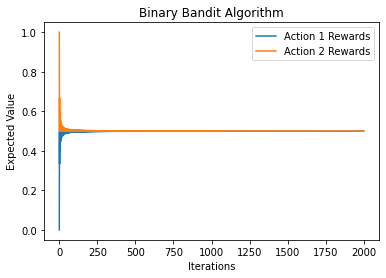

In [ ]:
# Simulation of Lower Left Quadrant (Quadrant III)
population = [0, 1]
action1_weights = [0.8, 0.2]
action2_weights = [0.9, 0.1]
binaryBanditSimulation(action1_weights,action2_weights,population,2000)

Now consider a task with success probabilities 0.8 and 0.9, corresponding to point B in the upper-right difficult quadrant of Figure 2.2. In this case both actions produce success almost all the time. Any method that takes success as an indication of correctness can easily become stuck selecting the wrong action.

Sutton, Richard S.; Barto, Andrew G.. Reinforcement Learning (Adaptive Computation and Machine Learning series) (Kindle Locations 797-808). MIT Press. Kindle Edition. 

Quadrant I Test:

*   Action 1 succeeds with probability of .9
*   Action 2 succeeds with probability of .8

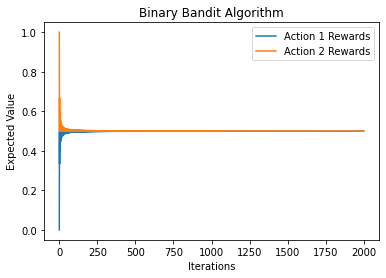

In [ ]:
# Simulation of Upper Right Quadrant (Quadrant I)
population = [0, 1]
action1_weights = [0.1, 0.9]
action2_weights = [0.2, 0.8]
binaryBanditSimulation(action1_weights,action2_weights,population,2000)